In [2]:
# example of a simple ODE, solved numerically
# y'(t) = f(t)

In [3]:
import numpy as np 
from matplotlib import pyplot as plt 
from numpy.linalg import norm

In [4]:
t0, tN, h = -1, 1, 0.05
t = np.arange(t0, tN+h, h)

In [5]:
# f(t) = y' = t**2

#this is a bad example cause here f is not dependent on y
def f(t,y):                     #TODO --> f(t, yt)
    dydt = t**2
    return dydt

def y(t):
    y = 1/3 * t**3 + 0
    return y
y0 = y(t0) #initial condition

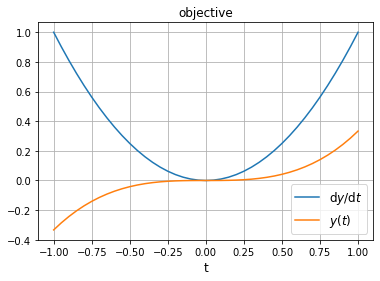

In [6]:
plt.plot(t,f(t, None), label="$\mathrm{d}y/\mathrm{d}t$")
plt.plot(t,y(t), label='$y(t)$')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('objective')
plt.show()

In [7]:
# solve the ODE using forward Euler method
# analytical solution given by: y(t) = 1/3 * t**3 + C

y_true = y(t) # y = 1/3 * t**3 + 0

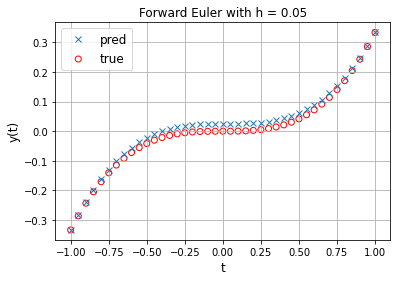

The L2-norm is: 0.11789039754506289


In [8]:
# Forward Euler
y_pred_FE = np.zeros(len(t))
y_pred_FE[0] = y0 #initial condition

for n in range(len(t)-1): #subtract 1 step because of init. cond. 
    y_pred_FE[n+1] = y_pred_FE[n] + h*f(t[n], None) 
error = norm([y_true - y_pred_FE],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_FE, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('Forward Euler with h = {0}'.format(h))
plt.show()
print('The L2-norm is: {0}'.format(error))

In [9]:
# another function, where is f(t, y(t))
def dydt(t, y):
    dydt = 2*y
    return dydt

def exact(t):
    return np.exp(2*t)

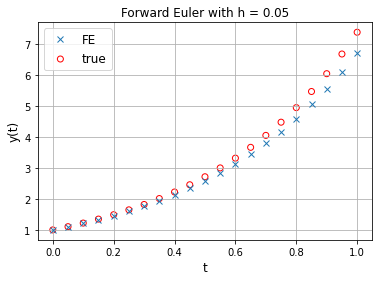

The L2-norm is: 1.26911430039941


In [10]:
# FORWARD EULER METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_FE = np.zeros(len(t))
y_pred_FE[0] = y0
for n in range(len(t)-1):
    y_pred_FE[n+1] = y_pred_FE[n] + h*dydt(t,y_pred_FE[n])
error = norm([exact(t) - y_pred_FE],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t, y_pred_FE, 'x', label='FE')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.title('Forward Euler with h = {0}'.format(h))
plt.legend(loc='best',fontsize='large'); plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

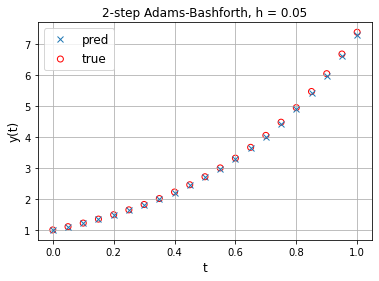

The L2-norm is: 0.18439630642631671


In [11]:
# ADAMS-BASHFORTH 2 STEP METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_AB2 = np.zeros(len(t))

# ====== initial conditions ========
y_pred_AB2[0] = y0
y_pred_AB2[1] = y_pred_AB2[0] + h*dydt(t, y_pred_AB2[0]) #one step FE
for n in range(len(t)-2):
    y_pred_AB2[n+2] = y_pred_AB2[n+1] + h*(3/2*dydt(None, y_pred_AB2[n+1]) - 1/2*dydt(None, y_pred_AB2[n]))
error = norm([exact(t) - y_pred_AB2],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB2, marker='x',linestyle='',label='pred')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('2-step Adams-Bashforth, h = {0}'.format(h))
plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

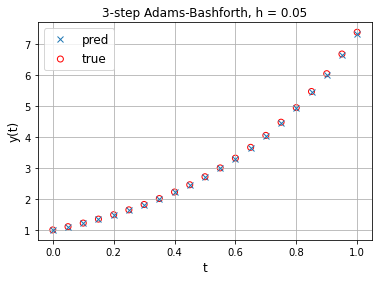

The L2-norm is: 0.09600479445823046


In [12]:
# ADAMS-BASHFORTH 3 STEP METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_AB3 = np.zeros(len(t))
# ====== initial conditions ========
y_pred_AB3[0] = y0
#one step FE
y_pred_AB3[1] = y_pred_AB3[0] + h*dydt(t, y_pred_AB3[0])
# one step Adams Bashforth
y_pred_AB3[2] = y_pred_AB2[1] + h*(3/2*dydt(None, y_pred_AB2[1]) - 1/2*dydt(None, y_pred_AB2[0]))

for n in range(len(t)-3):
    y_pred_AB3[n+3] = y_pred_AB3[n+2] + h*(23/12*dydt(t, y_pred_AB3[n+2]) - 16/12*dydt(t, y_pred_AB3[n+1]) + 5/12*dydt(t, y_pred_AB3[n]))
error = norm([exact(t) - y_pred_AB3],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB3, marker='x',linestyle='',label='pred')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('3-step Adams-Bashforth, h = {0}'.format(h))
plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

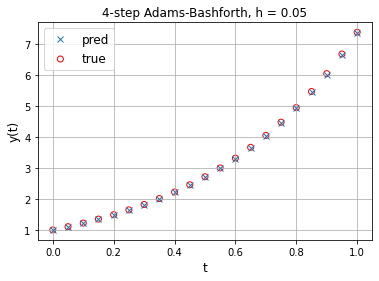

The L2-norm is: 0.09098591173610782


In [13]:
# ADAMS-BASHFORTH 4 STEP METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_AB4 = np.zeros(len(t))
# ====== initial conditions ========
y_pred_AB4[0] = y0
#one step FE
y_pred_AB4[1] = y_pred_AB4[0] + h*dydt(t, y_pred_AB4[0])
# one step Adams Bashforth 2step
y_pred_AB4[2] = y_pred_AB4[1] + h*(3/2*dydt(None, y_pred_AB4[1]) - 1/2*dydt(None, y_pred_AB4[0])) 
# one step Adams Bashforth 3step
y_pred_AB4[3] = y_pred_AB4[2] + h*(23/12*dydt(t, y_pred_AB4[2]) - 16/12*dydt(t, y_pred_AB4[1]) + 5/12*dydt(t, y_pred_AB4[0]))

for n in range(len(t)-4):
    y_pred_AB4[n+4] = y_pred_AB4[n+3] + h*(55/24*dydt(t, y_pred_AB4[n+3]) - 59/24*dydt(t, y_pred_AB4[n+2]) + 37/24*dydt(t, y_pred_AB4[n+1]) - 9/24*dydt(t, y_pred_AB4[n]))
error = norm([exact(t) - y_pred_AB4],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB4, marker='x',linestyle='',label='pred')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('4-step Adams-Bashforth, h = {0}'.format(h))
plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

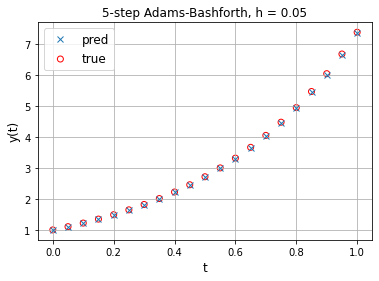

The L2-norm is: 0.08923555278637767


In [14]:
# ADAMS-BASHFORTH 5 STEP METHOD
t0 = 0; tN = 1; h = 0.05
t = np.arange(t0, tN+h, h)
y0 = 1 # exact(t0) = 1

y_pred_AB5 = np.zeros(len(t))
# ====== initial conditions ========
y_pred_AB5[0] = y0
# one step FE
y_pred_AB5[1] = y_pred_AB5[0] + h*dydt(t, y_pred_AB5[0])
# one step Adams Bashforth 2step
y_pred_AB5[2] = y_pred_AB5[1] + h*(3/2*dydt(t, y_pred_AB5[1]) - 1/2*dydt(t, y_pred_AB5[0])) 
# one step Adams Bashforth 3step
y_pred_AB5[3] = y_pred_AB5[2] + h*(23/12*dydt(t, y_pred_AB5[2]) - 16/12*dydt(t, y_pred_AB5[1]) + 5/12*dydt(t, y_pred_AB5[0]))
# one step Adams Bashforth 4step
y_pred_AB5[4] = y_pred_AB5[3] + h*(55/24*dydt(t, y_pred_AB5[3]) - 59/24*dydt(t, y_pred_AB5[2]) + 37/24*dydt(t, y_pred_AB5[1]) - 9/24*dydt(t, y_pred_AB5[0]))

for n in range(len(t)-5):
    y_pred_AB5[n+5] = y_pred_AB5[n+4] + h*(1901/720*dydt(t, y_pred_AB5[n+4]) - 2774/720*dydt(t, y_pred_AB5[n+3]) + 2616/720*dydt(t, y_pred_AB5[n+2]) - 1274/720*dydt(t, y_pred_AB5[n+1]) + 251/720*dydt(t, y_pred_AB5[n]))
error = norm([exact(t) - y_pred_AB5],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB5, marker='x',linestyle='',label='pred')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('5-step Adams-Bashforth, h = {0}'.format(h))
plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

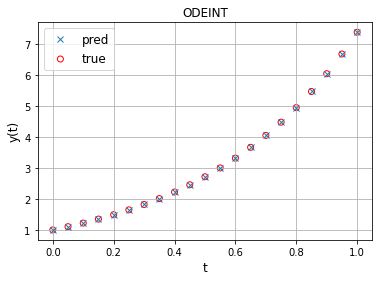

The L2-norm is: 6.02422098450504e-07


In [15]:
# ODEint as Benchmark
from scipy.integrate import odeint


sol = odeint(dydt,y0,t, tfirst=True)
error = norm([exact(t) - sol.T[0]],2)

plt.figure()
plt.scatter(t,exact(t),facecolors='none', edgecolors='r',label='true')
plt.plot(t,sol, marker='x',linestyle='',label='pred')
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('ODEINT'); plt.grid(); plt.show()
print('The L2-norm is: {0}'.format(error))

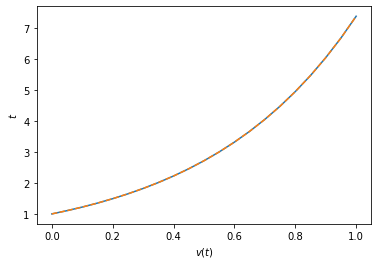

In [17]:
# solve_ivp as Benchmark
from scipy.integrate import solve_ivp

sol1 = solve_ivp(dydt, t_span=(0,max(t)), y0=[y0], t_eval=t)
sol2 = odeint(dydt,y0=y0, t=t, tfirst=True) #returns a 2D array

sol1 = sol1.y[0] #transpose and take first element (since it's not a system of ODE) --> velocities as a function of time
sol2 = sol2.T[0]


plt.figure()
plt.plot(t,sol1)
plt.plot(t,sol2, '--')
plt.xlabel('$v(t)$')
plt.ylabel('$t$')
plt.show()

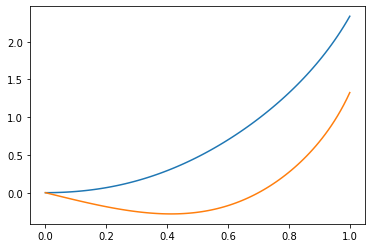

In [18]:
# Coupled ODEs
def dSdx(x, S):
    y1, y2 = S
    return [y1+y2**2+3*x, 
            3*y1+y2**3-np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

x = np.linspace(0,1,100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

y1_sol = sol.T[0]
y2_sol = sol.T[1]

plt.figure()
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)
plt.show()